# Case Study: Anime Rating Prediction

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Key Questions:

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. Detailed attribute information can be found below.

**Attribute Information**:

1. title - title of anime
2. description - synopsis of plot
3. mediaType - format of publication
4. eps - number of episodes (movies are considered 1 episode)
5. duration - duration of episode in minutes
6. ongoing - whether it is ongoing
7. sznOfRelease - season of release (Winter, Spring, Fall)
8. years_running - number of years the anime ran/is running
9. studio_primary - primary studio of production
10. studios_colab - whether there was a collaboration between studios to produce the anime
11. contentWarn - whether anime has a content warning
12. watched - number of users that completed it
13. watching - number of users that are watching it
14. wantWatch - number of users that want to watch it
15. dropped - number of users that dropped it before completion
16. rating - average user rating
17. votes - number of votes that contribute to rating
18. tag_Based_on_a_Manga - whether the anime is based on a manga
19. tag_Comedy - whether the anime is of Comedy genre
20. tag_Action - whether the anime is of Action genre
21. tag_Fantasy - whether the anime is of Fantasy genre
22. tag_Sci_Fi - whether the anime is of Sci-Fi genre
23. tag_Shounen - whether the anime has a tag Shounen
24. tag_Original_Work - whether the anime is an original work
25. tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
26. tag_Drama - whether the anime is of Drama genre
27. tag_Adventure - whether the anime is of Adventure genre
28. tag_Family_Friendly - whether the anime is family-friendly
29. tag_Short_Episodes - whether the anime has short episodes
30. tag_School_Life - whether the anime is regarding school life
31. tag_Romance - whether the anime is of Romance genre
32. tag_Shorts - whether the anime has a tag Shorts
33. tag_Slice_of_Life - whether the anime has a tag Slice of Life
34. tag_Seinen - whether the anime has a tag Seinen
35. tag_Supernatural - whether the anime has a tag Supernatural
36. tag_Magic - whether the anime has a tag Magic
37. tag_Animal_Protagonists - whether the anime has animal protagonists
38. tag_Ecchi - whether the anime has a tag Ecchi
39. tag_Mecha - whether the anime has a tag Mecha
40. tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
41. tag_CG_Animation - whether the anime has a tag CG Animation
42. tag_Superpowers - whether the anime has a tag Superpowers
43. tag_Others - whether the anime has other tags
44. tag_is_missing - whether tag is missing or not

## Let's start coding!

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<IPython.core.display.Javascript object>

### Load data

In [3]:
df = pd.read_csv("anime_data.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying the data to another variable to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

**Let's view the first 5 and last 5 rows of the dataset.**

In [5]:
# to view first 5 rows of the dataset
data.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [6]:
# to view last 5 rows of the dataset
data.tail()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Princess Vanilla is a princess in a land of ic...,Movie,1,NaN,False,is_missing,0,TMS Entertainment,0,0,22.0,1,29,1,2.807,10,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12097,Hulaing Babies Petit,NaN,TV,12,5.0,False,Winter,0,Others,0,0,13.0,10,77,2,2.090,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12098,Marco & The Galaxy Dragon,NaN,OVA,1,NaN,False,is_missing,0,is_missing,0,0,17.0,0,65,0,2.543,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12099,Xing Chen Bian 2nd Season,Second season of Xing Chen Bian.,Web,3,24.0,True,is_missing,0,is_missing,0,0,40.5,31,22,0,3.941,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,Movie,1,20.0,False,is_missing,0,Shin-Ei Animation,0,0,15.0,1,19,1,2.925,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

**Let's check the shape of the dataset.**

In [7]:
data.shape

(12101, 44)

<IPython.core.display.Javascript object>

* The dataset has 12101 rows and 44 columns 

**Let's check the columns in the data.**

In [8]:
print(data.columns)

Index(['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')


<IPython.core.display.Javascript object>

**Let's check the data types of the columns in the dataset.**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

<IPython.core.display.Javascript object>

* Dependent variable is the rating of an anime, which if of *float* type.
* *title*, *description*, *mediaType*, *sznOfRelease*, *studio_primary* are of *object* type.
* *ongoing* column is of *bool* type.
* All other columns are numeric in nature.
* There are missing values in the *description* and *duration* columns.

**Let's check for missing values in the data.**

In [10]:
data.isnull().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

<IPython.core.display.Javascript object>

* *duration* column has 4636 missing values, and *description* column has 4468 missing values.
* No other column has missing values.

### Summary of the dataset.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


<IPython.core.display.Javascript object>

* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.

* Some anime even have a runtime of 1 minute.
    - This seems strange at first, but a Google search can reveal that there are indeed such anime.


* At least 75% of the anime have run for less than a year.
    - This may be because the listed anime has few episodes only.


* At least 75% of the anime have no content warnings.

* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

**Let's look at the non-numeric columns.**

In [12]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
# we will skip the title and description columns as they will have a lot of unique values
for i in ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in mediaType are :
TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64
**************************************************
Unique values in ongoing are :
False    11986
True       115
Name: ongoing, dtype: int64
**************************************************
Unique values in sznOfRelease are :
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64
**************************************************
Unique values in studio_primary are :
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                    

<IPython.core.display.Javascript object>

* Most of the anime in the data are either TV series or movies.
* Most of the anime in the data are not ongoing.
* The season of release is missing for most of the anime in the data.
* *Toei Animation* and *Sunrise* are the top two studios (excluding other studios and missing studios).

**We will drop the *title* and *description* columns before moving forward as they have a lot of text in them.**

In [14]:
data.drop(["title", "description"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### We will drop the missing values in the dataset.

In [15]:
data.dropna(inplace=True)
data.shape

(7465, 42)

<IPython.core.display.Javascript object>

### We will discuss better ways of dealing with missing values in the next session.

## Let's visualize the data

### Univariate Analysis

In [16]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### *rating* (the target variable)

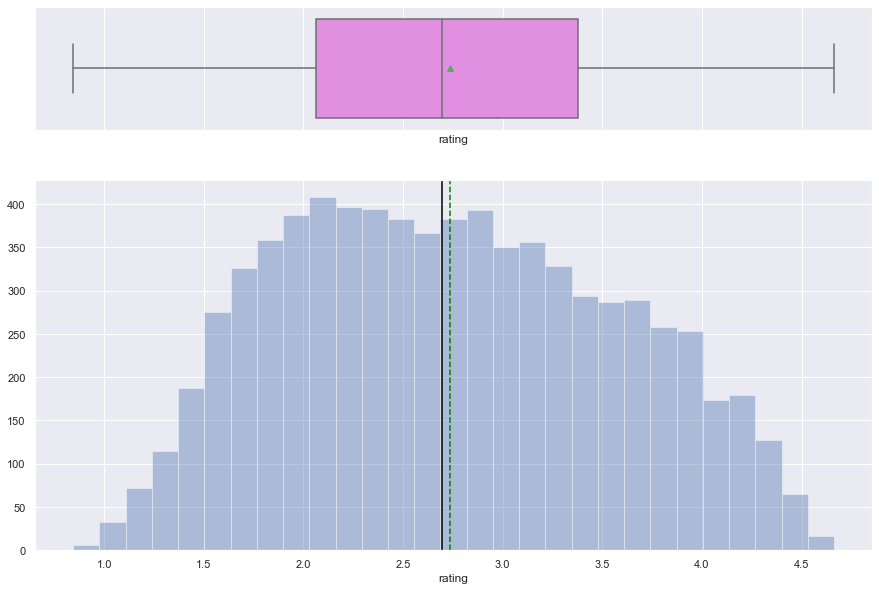

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data["rating"])

* The anime ratings are close to normally distributed.

### *eps*

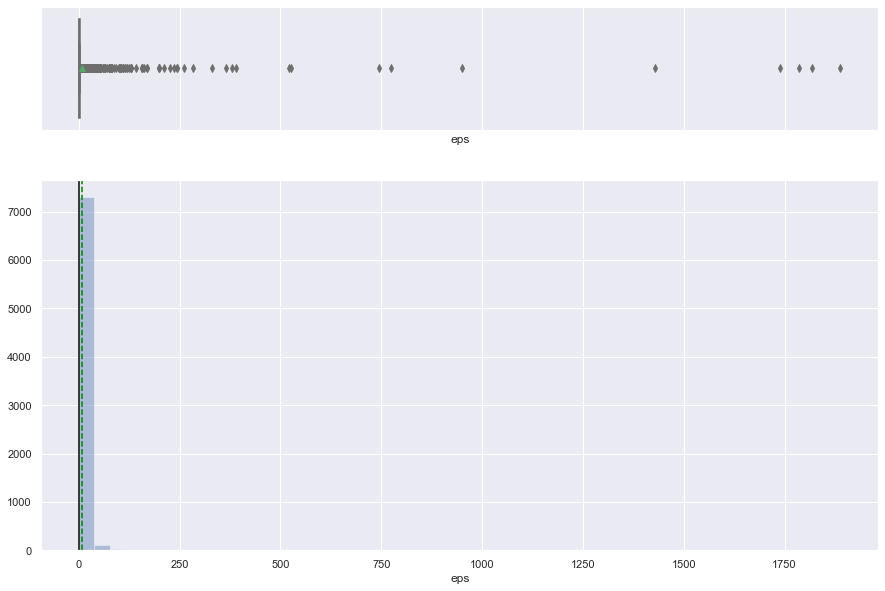

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data["eps"])

* The distribution is heavily right-skewed, as there are many anime movies in the data, and they are considered to be of only one episode (as per data description).

### *duration*

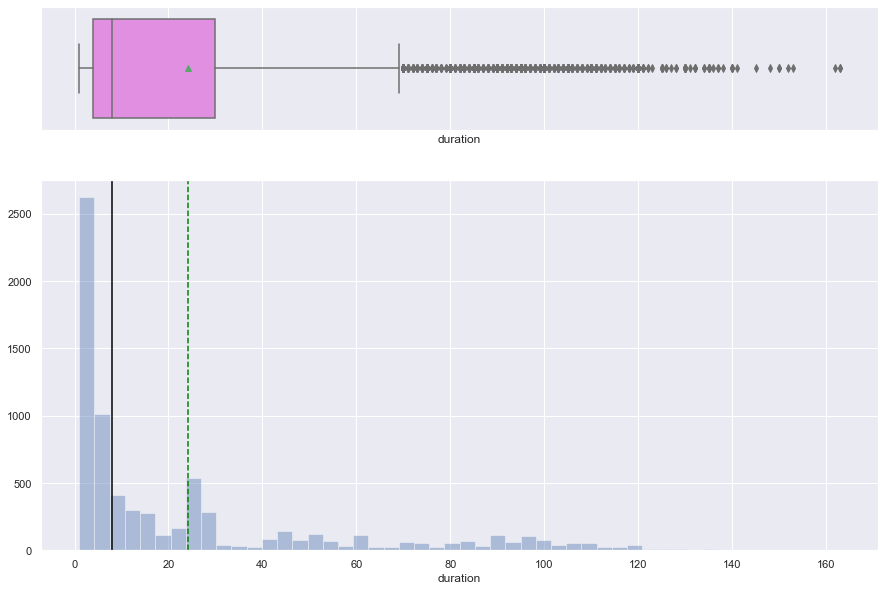

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data["duration"])

* The distribution is right-skewed with a median runtime of less than 10 minutes.

### *watched*

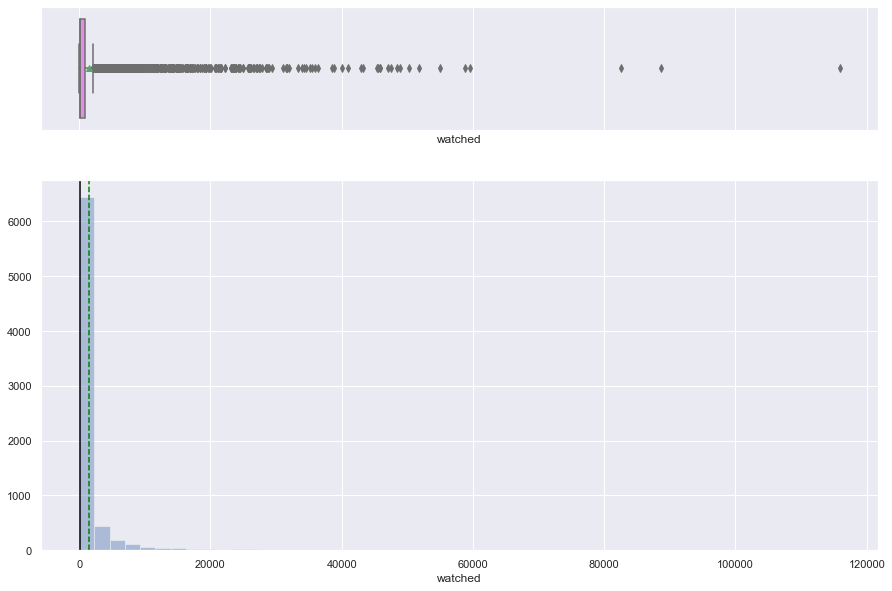

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data["watched"])

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

### *years_running*

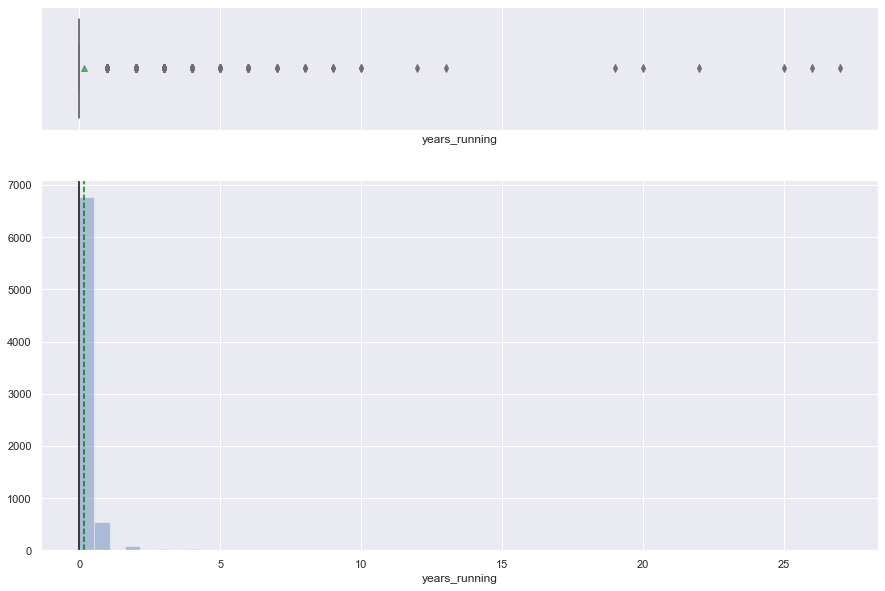

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data["years_running"])

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### *mediaType*

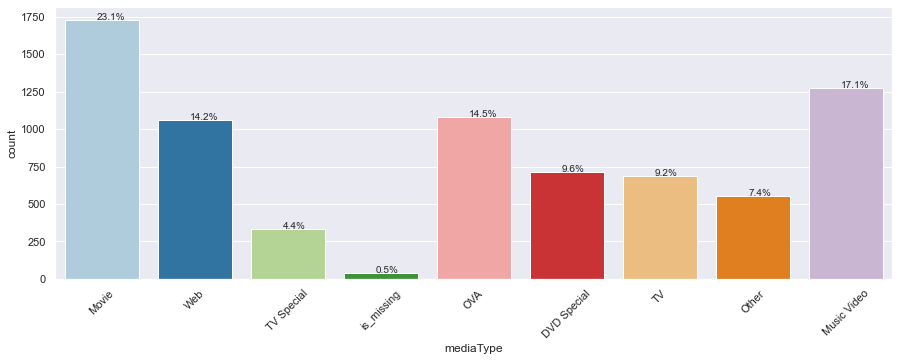

<IPython.core.display.Javascript object>

In [23]:
perc_on_bar(data, "mediaType")

* Distribution of the media types has changed a lot after dropping the rows with missing values.
* Most of the anime now are movies or music videos.

### *ongoing*

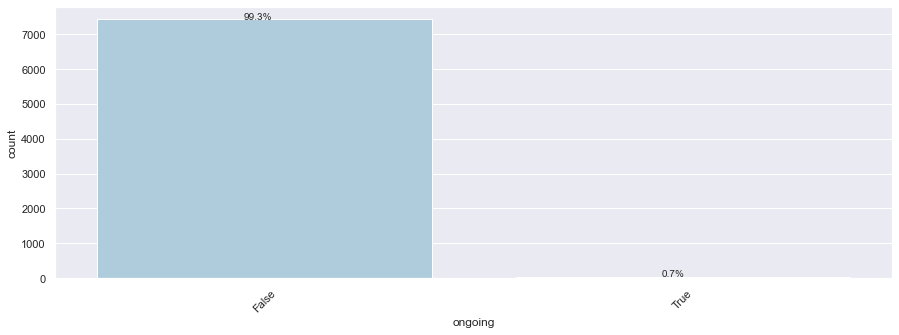

<IPython.core.display.Javascript object>

In [24]:
perc_on_bar(data, "ongoing")

* Very few anime in the data are ongoing.

### *sznOfRelease*

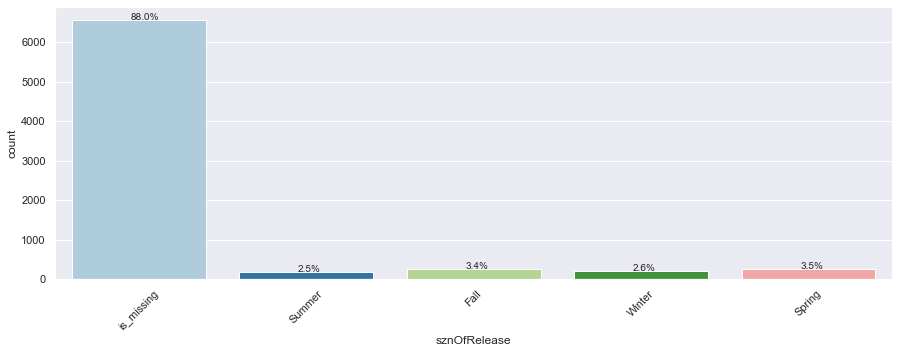

<IPython.core.display.Javascript object>

In [25]:
perc_on_bar(data, "sznOfRelease")

* The season of release of anime is spread out across all seasons when the value is available.

### *studio_primary*

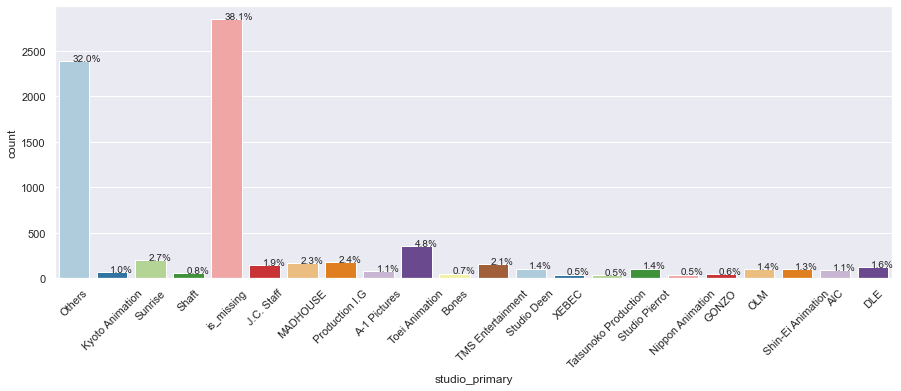

<IPython.core.display.Javascript object>

In [26]:
perc_on_bar(data, "studio_primary")

* *Toei Animation* is the most common studio among the available studio names.

In [27]:
# creating a list of tag columns
tag_cols = [item for item in data.columns if "tag" in item]

<IPython.core.display.Javascript object>

In [28]:
# checking the values in tag columns
for i in tag_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in tag_Based_on_a_Manga are :
0    5718
1    1747
Name: tag_Based_on_a_Manga, dtype: int64
**************************************************
Unique values in tag_Comedy are :
0    5545
1    1920
Name: tag_Comedy, dtype: int64
**************************************************
Unique values in tag_Action are :
0    6227
1    1238
Name: tag_Action, dtype: int64
**************************************************
Unique values in tag_Fantasy are :
0    6342
1    1123
Name: tag_Fantasy, dtype: int64
**************************************************
Unique values in tag_Sci_Fi are :
0    6511
1     954
Name: tag_Sci_Fi, dtype: int64
**************************************************
Unique values in tag_Shounen are :
0    6625
1     840
Name: tag_Shounen, dtype: int64
**************************************************
Unique values in tag_Original_Work are :
0    6548
1     917
Name: tag_Original_Work, dtype: int64
**************************************************
Unique val

<IPython.core.display.Javascript object>

* There are 1747 anime that are based on manga.
* There are 1920 anime of the Comedy genre.
* There are 1079 anime of the Romance genre.

### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [29]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


<IPython.core.display.Javascript object>

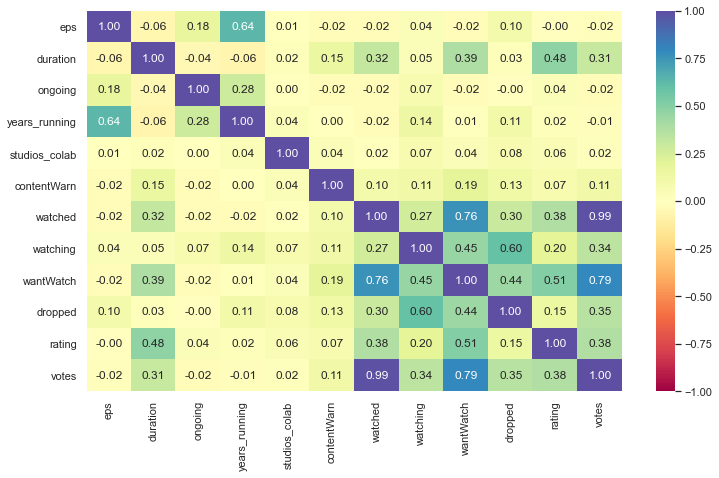

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* *watched* and *wantWatch* columns are highly correlated.
* *watched* and *votes* columns are very highly correlated.
* *wantWatch* and *votes* columns are highly correlated.

### Let's check the variation in *rating* with some of the categorical columns in our data

### *mediaType* vs *rating*

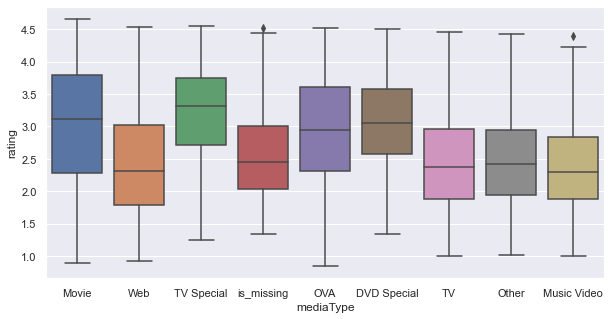

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=data)

* Anime available as TV series, web series, or music videos have a lower rating in general.

### *sznOfRelease* vs *rating*

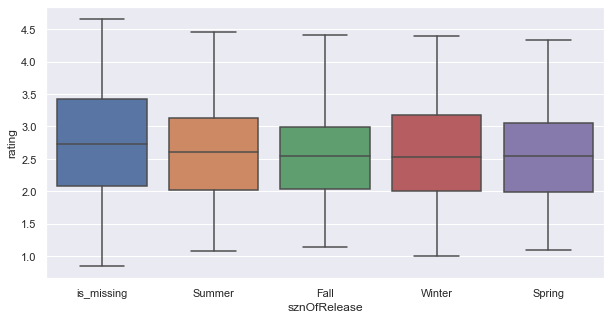

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=data)

* Anime ratings are almost uniformly spread across all the seasons of release.

### *studio_primary* vs *rating*

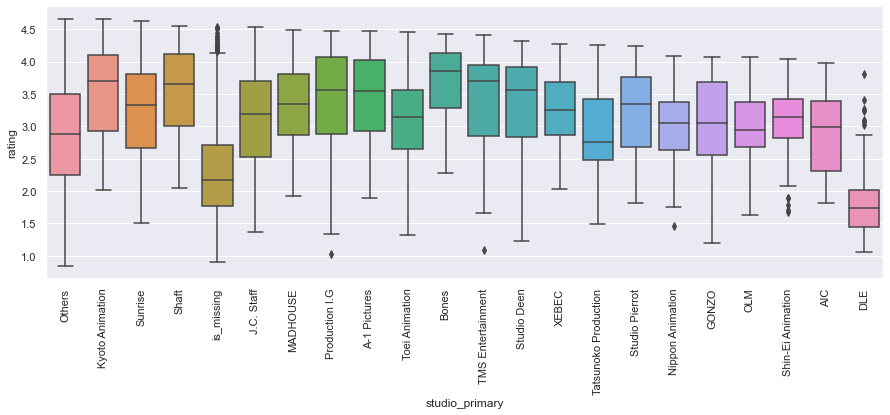

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=data)
plt.xticks(rotation=90)

* In general, the ratings are low for anime produced by *DLE* studios.
* Ratings are also low, in general, for anime produced by studios other than the ones in the data.

**We will drop the *votes* column from the data as *watched* and *votes* columns are very highly correlated.**

In [34]:
data.drop("votes", axis=1, inplace=True)
data.shape

(7465, 41)

<IPython.core.display.Javascript object>

## Model Building

### Define independent and dependent variables

In [35]:
ind_vars = data.drop(["rating"], axis=1)
dep_var = data[["rating"]]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [36]:
# we will create dummy variables for the categorical columns


def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,eps,duration,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,mediaType_is_missing,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,107.0,False,0,0,0,58831.0,1453,21733,124,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,130.0,False,0,0,1,45892.0,946,17148,132,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,111.0,False,0,0,0,8454.0,280,6624,150,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27,1,125.0,False,0,0,0,115949.0,589,12388,161,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31,1,117.0,False,0,0,0,35896.0,538,15651,130,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [37]:
ind_vars_num.shape

(7465, 70)

<IPython.core.display.Javascript object>

### Split the data into train and test

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [39]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 5225
Number of rows in train data = 2240


<IPython.core.display.Javascript object>

### Fitting a linear model

In [40]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [41]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
eps,0.000378
duration,0.005402
ongoing,0.577145
years_running,0.014301
studios_colab,0.021683
contentWarn,-0.208916
watched,-0.000006
watching,0.000037
wantWatch,0.000194
dropped,-0.000406


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficients of *eps*, *duration*, *years_running*, *ongoing*, some of the *tag* columns, all the *sznOfRelease* columns, some of the *studio* columns, etc. are positive.
    - Increase in these will lead to an increase in the rating of an anime.


* Coefficients of *contentWarn*, *watched*, *dropped*, some of the *tag* columns, all the *mediaType* columns, and some of the *studio* columns are negative.
    - Increase in these will lead to a decrease in the rating of an anime.

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.
* We will create a function that will print out all the above metrics in one go.

In [42]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [43]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE      R^2  Adjusted R^2
0  0.579061  0.468019  0.51858      0.512041


<IPython.core.display.Javascript object>

In [44]:
# Checking model performance on test set
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.571535  0.464794  0.511565      0.495802


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.52 and 0.51, indicating that the model explains 52% and 51% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.47

- However, the overall performance is not so great.

## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*.

**Why should we do feature selection?**

- Reduces dimensionality
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization)
- Speeds training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables

In [45]:
# please uncomment and run the next line if mlxtend library is not previously installed
#!pip install mlxtend

<IPython.core.display.Javascript object>

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished

[2021-05-12 20:48:34] Features: 1/70 -- score: 0.261089359587903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.4s finished

[2021-05-12 20:48:35] Features: 2/70 -- score: 0.35226630853482477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.3s finished

[2021-05-12 20:48:35] Features: 3/70 -- score: 0.4005056411016484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  67 out o

[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.0s finished

[2021-05-12 20:49:01] Features: 30/70 -- score: 0.5040258792470933[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.0s finished

[2021-05-12 20:49:03] Features: 31/70 -- score: 0.5044621014698831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.0s finished

[2021-05-12 20:49:04] Features: 32/70 -- score: 0.5047878564940065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.1s finished

[2021-05-12 20:49:05] Features: 33/70 -- score: 0.5050882316830303[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.1s f

[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2021-05-12 20:49:36] Features: 62/70 -- score: 0.5044280558206142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2021-05-12 20:49:37] Features: 63/70 -- score: 0.5040398015131806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2021-05-12 20:49:37] Features: 64/70 -- score: 0.5036284698564547[Parallel(n_jobs=-1)]: Using 

<IPython.core.display.Javascript object>

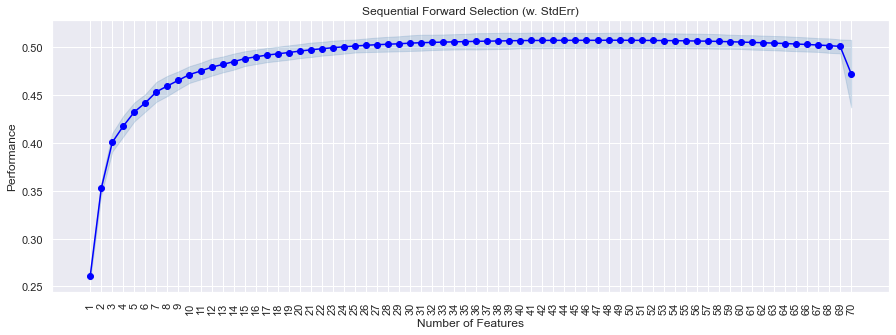

<IPython.core.display.Javascript object>

In [47]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* We can see that performance increases till the 30th feature and then slowly becomes constant, and then drops sharply after the 70th feature is added.
* The decision to choose the k_features now depends on the adjusted $R^2$ vs the complexity of the model.
    - With 30 features, we are getting an adjusted $R^2$ of 0.504 and with 48 features, we are getting an adjusted $R^2$ of 0.507.
* The increase in adjusted $R^2$ is not very significant as we are getting the same values with a less complex model.
* So we'll use 30 features only to build our model, but you can experiment by taking a different number.
- Number of features chosen will also depend on the business context and use case of the model.

In [48]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished

[2021-05-12 20:49:45] Features: 1/30 -- score: 0.261089359587903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.5s finished

[2021-05-12 20:49:45] Features: 2/30 -- score: 0.35226630853482477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.6s finished

[2021-05-12 20:49:46] Features: 3/30 -- score: 0.4005056411016484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  67 out o

[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.3s finished

[2021-05-12 20:50:14] Features: 30/30 -- score: 0.5040258792470933

<IPython.core.display.Javascript object>

In [49]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 5, 8, 9, 10, 12, 13, 15, 18, 20, 21, 24, 25, 26, 27, 32, 37, 39, 40, 41, 43, 49, 51, 53, 58, 63, 67, 69]


<IPython.core.display.Javascript object>

In [50]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['duration', 'ongoing', 'years_running', 'contentWarn', 'wantWatch',
       'dropped', 'tag_Based_on_a_Manga', 'tag_Action', 'tag_Fantasy',
       'tag_Shounen', 'tag_Drama', 'tag_Family_Friendly', 'tag_Short_Episodes',
       'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Based_on_a_Light_Novel', 'mediaType_Movie', 'mediaType_OVA',
       'mediaType_Other', 'mediaType_TV', 'mediaType_Web',
       'studio_primary_AIC', 'studio_primary_DLE', 'studio_primary_J.C. Staff',
       'studio_primary_Others', 'studio_primary_Studio Pierrot',
       'studio_primary_Toei Animation', 'studio_primary_is_missing'],
      dtype='object')

<IPython.core.display.Javascript object>

**Now we will fit an sklearn model using these features only.**

In [51]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [52]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [53]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                               Coefficients
duration                           0.005215
ongoing                            0.568973
years_running                      0.027224
contentWarn                       -0.220852
wantWatch                          0.000184
dropped                           -0.000373
tag_Based_on_a_Manga               0.197253
tag_Action                         0.101091
tag_Fantasy                        0.171016
tag_Shounen                        0.191480
tag_Drama                          0.275360
tag_Family_Friendly               -0.141726
tag_Short_Episodes                -0.118410
tag_Shorts                        -0.180022
tag_Slice_of_Life                  0.218984
tag_Seinen                         0.103978
tag_Supernatural                   0.156922
tag_Based_on_a_Light_Novel         0.361562
mediaType_Movie                   -0.165296
mediaType_OVA                     -0.187871
mediaType_Other                   -0.130636
mediaType_TV                    

<IPython.core.display.Javascript object>

In [54]:
# model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance

      RMSE       MAE       R^2  Adjusted R^2
0  0.58345  0.472425  0.511254      0.508431


Test Performance

       RMSE       MAE      R^2  Adjusted R^2
0  0.575555  0.469355  0.50467      0.497943


<IPython.core.display.Javascript object>

* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* **We will be moving forward with our previous model as it shows better performance.**

## Conclusions

- We have been able to build a predictive model that can be used by Streamist to predict the rating of an anime with an $R^2$ of 0.51 on the training set.


- Streamist can use this model to predict the anime ratings within a mean error of 0.47


- We found that the number of episodes in the anime, the duration of each episode, and whether or not an anime is ongoing are some of the factors which tend to increase the rating of an anime.


- We found that content warnings and the number of people who dropped watching the anime before completion are some of the factors which tend to decrease the rating of an anime.


- We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the anime ratings more accurately.

## In the next session, we will introduce the raw and messier version of this data to demonstrate the steps involved in building a predictive model from raw data.